In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
print (uploaded['OrigaList.csv'][:200].decode('utf-8') + '...')

Eye,Filename,ExpCDR,Set,Glaucoma
OD,001.jpg,0.7097,A,0
OS,002.jpg,0.6953,A,0
OS,003.jpg,0.9629,A,0
OD,004.jpg,0.7246,A,0
OS,005.jpg,0.6138,A,0
OD,006.jpg,0.6451,B,0
OS,007.jpg,0.5255,A,0
OD,00...


Passa arquivos de uma pasta do drive pra outra, usada pra passar as imagens de um banco de dados pra outra pasta

In [2]:
import os
import csv
import shutil
from PIL import Image

def convert_image(file_path, destination, target_extension):
    image = Image.open(file_path)
    image = image.convert("RGB")
    new_file_path = os.path.splitext(destination)[0] + "." + target_extension
    image.save(new_file_path)
    shutil.move(file_path, new_file_path)

out = open("OrigaList.csv", "r")
data = csv.reader(out)
data = [[row[0], row[1], row[2], row[3], row[4]] for row in data] 
class1 = []

for row in data:
    if row[4] == '1':
        aa = row[1]
        class1.append(aa)
        ee = "/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/Masks/" + aa
        destination = "/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/classe 1/" + aa.replace(".png", ".jpg")
        convert_image(ee, destination, "jpg")
    elif row[4] == '0':
        bb = row[1]
        class1.append(bb)
        gg = "/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/Masks/" + bb
        destination = "/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/classe 0/" + bb.replace(".png", ".jpg")
        convert_image(gg, destination, "jpg")

out.close()
print(data)
new_data = [[row[0], row[1], row[2], row[3], row[4]] for row in data]

out = open("new_data.csv", "w")
output = csv.writer(out)
for row in new_data:
    output.writerow(row)
out.close()


FileNotFoundError: ignored

In [ ]:
import os 
print(os.listdir(("/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA")))

['OrigaList.csv', 'origa_info.csv', 'Images_Cropped', 'Images_Square', 'Images', 'Masks_Square', 'Masks', 'Masks_Cropped', 'Semi-automatic-annotations', 'Class1', 'Class0', 'train', 'test']


In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras.utils as image
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#import os
#for dirname, _, filenames in os.walk('/kaggle/input/glaucoma-datasets'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        



# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint("f1.h5", monitor='acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=0, mode='auto', cooldown=0, min_lr=0)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/train/',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/test/',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 603 images belonging to 2 classes.
Found 47 images belonging to 2 classes.


In [ ]:

!apt-get install python3.6



In [ ]:
!pip install tensorflow==2.8.0


In [ ]:
batch_size=32
model_info=classifier.fit_generator(training_set,
steps_per_epoch = 455//batch_size,
epochs = 30,
validation_data = test_set,
validation_steps = 30//batch_size,callbacks=[checkpoint, reduce_lr])

In [ ]:
!pip install --upgrade tensorflow

In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Definir o tamanho das imagens de entrada
img_size = (224, 224)

# Definir o tamanho do batch e número de épocas
batch_size = 32
epochs = 100

# Definir o número de passos por época para o conjunto de treinamento e validação
train_steps_per_epoch = 455 // batch_size
val_steps_per_epoch = 30 // batch_size

# Definir o número de filtros para cada camada convolucional
num_filters = [32, 64, 128]

# Definir a taxa de aprendizagem inicial
learning_rate = 1e-4

# Criar geradores de imagens para treinamento e validação
train_datagen = ImageDataGenerator(
    rescale=1./255,      # normalizar os valores dos pixels
    rotation_range=20,   # girar aleatoriamente as imagens em até 20 graus
    width_shift_range=0.2,   # mover aleatoriamente as imagens horizontalmente
    height_shift_range=0.2,  # mover aleatoriamente as imagens verticalmente
    shear_range=0.2,     # aplicar cisalhamento nas imagens
    zoom_range=0.2,      # aplicar zoom nas imagens
    horizontal_flip=True,    # espelhar aleatoriamente as imagens horizontalmente
    validation_split=0.2   # definir a proporção de imagens para validação
)

# Criar gerador de imagens de treinamento
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/train/',  # diretório com as imagens
    target_size=img_size,    # tamanho das imagens
    batch_size=batch_size,     # tamanho do lote
    class_mode='binary',       # modo de classificação (binário ou multiclasse)
    subset='training',         # usar apenas as imagens de treinamento
    shuffle=True               # embaralhar as imagens a cada época
)

# Criar gerador de imagens de validação
val_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/valid/',  # diretório com as imagens
    target_size=img_size,    # tamanho das imagens
    batch_size=batch_size,     # tamanho do lote
    class_mode='binary',       # modo de classificação (binário ou multiclasse)
    subset='validation',       # usar apenas as imagens de validação
    shuffle=True               # embaralhar as imagens a cada época
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Carregar os conjuntos de treinamento e validação
train_set = train_datagen.flow_from_directory(
    directory='/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/train/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)



val_set = val_datagen.flow_from_directory(
    directory='/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/valid/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Definir o modelo da rede neural
model = tf.keras.models.Sequential([
    # Camada convolucional 1
    tf.keras.layers.Conv2D(num_filters[0], 3, activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2),
    # Camada convolucional 2
    tf.keras.layers.Conv2D(num_filters[1], 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    # Camada convolucional 3
    tf.keras.layers.Conv2D(num_filters[2], 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    # Camada Flatten
    tf.keras.layers.Flatten(),
    # Camada Dense
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # Camada de saída
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Definir os callbacks
checkpoint = ModelCheckpoint('path/to/model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1,save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, mode='min', verbose=1)

# Treinar o modelo
model_info = model.fit(
    train_set,
    epochs=epochs,
    validation_data=val_set,
    steps_per_epoch=train_steps_per_epoch,
    validation_steps=val_steps_per_epoch,
    callbacks=[checkpoint, reduce_lr]
)




Found 470 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 587 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/100
14/14 [==============================] - ETA: 0s - loss: 0.5713 - accuracy: 0.7588

14/14 [==============================] - 65s 4s/step - loss: 0.5713 - accuracy: 0.7588 - lr: 1.0000e-04
Epoch 2/100
14/14 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.7541

14/14 [==============================] - 61s 4s/step - loss: 0.5593 - accuracy: 0.7541 - lr: 1.0000e-04
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 0.5761 - accuracy: 0.7455

14/14 [==============================] - 64s 4s/step - loss: 0.5761 - accuracy: 0.7455 - lr: 1.0000e-04
Epoch 4/100
14/14 [==============================] - ETA: 0s - loss: 0.5691 - accuracy: 0.7589

14/14 [==============================] - 64s 4s/step - loss: 0.5691 - accuracy: 0.7589 - lr: 1.0000e-04
Epoch 5/100
14/14 [==============================] - ETA: 0s - loss: 0.5404 - accuracy: 0.7752

14/14 [==============================] - 61s 4s/step - loss: 0.5404 - accuracy: 0.7752 - lr: 1.0000e-04
Epoch 6/100
14/14 [==============================] - ETA: 0s - loss: 0.5436 - accuracy: 0.7634

14/14 [==============================] - 64s 5s/step - loss: 0.5436 - accuracy: 0.7634 - lr: 1.0000e-04
Epoch 7/100
14/14 [==============================] - ETA: 0s - loss: 0.5200 - accuracy: 0.7775

14/14 [==============================] - 61s 4s/step - loss: 0.5200 - accuracy: 0.7775 - lr: 1.0000e-04
Epoch 8/100
14/14 [==============================] - ETA: 0s - loss: 0.5827 - accuracy: 0.7494

14/14 [==============================] - 60s 4s/step - loss: 0.5827 - accuracy: 0.7494 - lr: 1.0000e-04
Epoch 9/100
14/14 [==============================] - ETA: 0s - loss: 0.5748 - accuracy: 0.7447

14/14 [==============================] - 62s 5s/step - loss: 0.5748 - accuracy: 0.7447 - lr: 1.0000e-04
Epoch 10/100
14/14 [==============================] - ETA: 0s - loss: 0.5460 - accuracy: 0.7658

14/14 [==============================] - 62s 4s/step - loss: 0.5460 - accuracy: 0.7658 - lr: 1.0000e-04
Epoch 11/100
14/14 [==============================] - ETA: 0s - loss: 0.5406 - accuracy: 0.7752

14/14 [==============================] - 61s 5s/step - loss: 0.5406 - accuracy: 0.7752 - lr: 1.0000e-04
Epoch 12/100
14/14 [==============================] - ETA: 0s - loss: 0.5631 - accuracy: 0.7567

14/14 [==============================] - 64s 4s/step - loss: 0.5631 - accuracy: 0.7567 - lr: 1.0000e-04
Epoch 13/100
14/14 [==============================] - ETA: 0s - loss: 0.5289 - accuracy: 0.7799

14/14 [==============================] - 60s 4s/step - loss: 0.5289 - accuracy: 0.7799 - lr: 1.0000e-04
Epoch 14/100
14/14 [==============================] - ETA: 0s - loss: 0.5444 - accuracy: 0.7723

14/14 [==============================] - 63s 4s/step - loss: 0.5444 - accuracy: 0.7723 - lr: 1.0000e-04
Epoch 15/100
14/14 [==============================] - ETA: 0s - loss: 0.5513 - accuracy: 0.7658

14/14 [==============================] - 59s 4s/step - loss: 0.5513 - accuracy: 0.7658 - lr: 1.0000e-04
Epoch 16/100
14/14 [==============================] - ETA: 0s - loss: 0.5370 - accuracy: 0.7775

14/14 [==============================] - 61s 5s/step - loss: 0.5370 - accuracy: 0.7775 - lr: 1.0000e-04
Epoch 17/100
14/14 [==============================] - ETA: 0s - loss: 0.5513 - accuracy: 0.7567

14/14 [==============================] - 64s 4s/step - loss: 0.5513 - accuracy: 0.7567 - lr: 1.0000e-04
Epoch 18/100
14/14 [==============================] - ETA: 0s - loss: 0.5548 - accuracy: 0.7588

14/14 [==============================] - 61s 5s/step - loss: 0.5548 - accuracy: 0.7588 - lr: 1.0000e-04
Epoch 19/100
14/14 [==============================] - ETA: 0s - loss: 0.5481 - accuracy: 0.7635

14/14 [==============================] - 62s 4s/step - loss: 0.5481 - accuracy: 0.7635 - lr: 1.0000e-04
Epoch 20/100
14/14 [==============================] - ETA: 0s - loss: 0.5803 - accuracy: 0.7424

14/14 [==============================] - 61s 4s/step - loss: 0.5803 - accuracy: 0.7424 - lr: 1.0000e-04
Epoch 21/100
14/14 [==============================] - ETA: 0s - loss: 0.5681 - accuracy: 0.7494

14/14 [==============================] - 60s 4s/step - loss: 0.5681 - accuracy: 0.7494 - lr: 1.0000e-04
Epoch 22/100
14/14 [==============================] - ETA: 0s - loss: 0.5776 - accuracy: 0.7377

14/14 [==============================] - 61s 4s/step - loss: 0.5776 - accuracy: 0.7377 - lr: 1.0000e-04
Epoch 23/100
14/14 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.7500

14/14 [==============================] - 64s 4s/step - loss: 0.5696 - accuracy: 0.7500 - lr: 1.0000e-04
Epoch 24/100
14/14 [==============================] - ETA: 0s - loss: 0.5715 - accuracy: 0.7447

14/14 [==============================] - 60s 4s/step - loss: 0.5715 - accuracy: 0.7447 - lr: 1.0000e-04
Epoch 25/100
14/14 [==============================] - ETA: 0s - loss: 0.5587 - accuracy: 0.7455

14/14 [==============================] - 64s 4s/step - loss: 0.5587 - accuracy: 0.7455 - lr: 1.0000e-04
Epoch 26/100
14/14 [==============================] - ETA: 0s - loss: 0.5232 - accuracy: 0.7681

14/14 [==============================] - 61s 4s/step - loss: 0.5232 - accuracy: 0.7681 - lr: 1.0000e-04
Epoch 27/100
14/14 [==============================] - ETA: 0s - loss: 0.5528 - accuracy: 0.7611

14/14 [==============================] - 62s 4s/step - loss: 0.5528 - accuracy: 0.7611 - lr: 1.0000e-04
Epoch 28/100
14/14 [==============================] - ETA: 0s - loss: 0.5305 - accuracy: 0.7812

14/14 [==============================] - 65s 5s/step - loss: 0.5305 - accuracy: 0.7812 - lr: 1.0000e-04
Epoch 29/100
14/14 [==============================] - ETA: 0s - loss: 0.5604 - accuracy: 0.7518

14/14 [==============================] - 62s 4s/step - loss: 0.5604 - accuracy: 0.7518 - lr: 1.0000e-04
Epoch 30/100
14/14 [==============================] - ETA: 0s - loss: 0.5264 - accuracy: 0.7822

14/14 [==============================] - 61s 4s/step - loss: 0.5264 - accuracy: 0.7822 - lr: 1.0000e-04
Epoch 31/100
14/14 [==============================] - ETA: 0s - loss: 0.5556 - accuracy: 0.7635

14/14 [==============================] - 60s 4s/step - loss: 0.5556 - accuracy: 0.7635 - lr: 1.0000e-04
Epoch 32/100
14/14 [==============================] - ETA: 0s - loss: 0.5610 - accuracy: 0.7447

14/14 [==============================] - 61s 4s/step - loss: 0.5610 - accuracy: 0.7447 - lr: 1.0000e-04
Epoch 33/100
14/14 [==============================] - ETA: 0s - loss: 0.5356 - accuracy: 0.7681

14/14 [==============================] - 61s 4s/step - loss: 0.5356 - accuracy: 0.7681 - lr: 1.0000e-04
Epoch 34/100
14/14 [==============================] - ETA: 0s - loss: 0.5609 - accuracy: 0.7564

14/14 [==============================] - 60s 4s/step - loss: 0.5609 - accuracy: 0.7564 - lr: 1.0000e-04
Epoch 35/100
14/14 [==============================] - ETA: 0s - loss: 0.5409 - accuracy: 0.7611

14/14 [==============================] - 60s 4s/step - loss: 0.5409 - accuracy: 0.7611 - lr: 1.0000e-04
Epoch 36/100
14/14 [==============================] - ETA: 0s - loss: 0.5592 - accuracy: 0.7447

14/14 [==============================] - 62s 4s/step - loss: 0.5592 - accuracy: 0.7447 - lr: 1.0000e-04
Epoch 37/100
14/14 [==============================] - ETA: 0s - loss: 0.5408 - accuracy: 0.7611

14/14 [==============================] - 61s 4s/step - loss: 0.5408 - accuracy: 0.7611 - lr: 1.0000e-04
Epoch 38/100
14/14 [==============================] - ETA: 0s - loss: 0.5488 - accuracy: 0.7611

14/14 [==============================] - 61s 4s/step - loss: 0.5488 - accuracy: 0.7611 - lr: 1.0000e-04
Epoch 39/100
14/14 [==============================] - ETA: 0s - loss: 0.5410 - accuracy: 0.7588

14/14 [==============================] - 60s 4s/step - loss: 0.5410 - accuracy: 0.7588 - lr: 1.0000e-04
Epoch 40/100
14/14 [==============================] - ETA: 0s - loss: 0.5443 - accuracy: 0.7611

14/14 [==============================] - 61s 4s/step - loss: 0.5443 - accuracy: 0.7611 - lr: 1.0000e-04
Epoch 41/100
14/14 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.7822

14/14 [==============================] - 61s 4s/step - loss: 0.5347 - accuracy: 0.7822 - lr: 1.0000e-04
Epoch 42/100
14/14 [==============================] - ETA: 0s - loss: 0.5690 - accuracy: 0.7567

14/14 [==============================] - 62s 4s/step - loss: 0.5690 - accuracy: 0.7567 - lr: 1.0000e-04
Epoch 43/100
14/14 [==============================] - ETA: 0s - loss: 0.5366 - accuracy: 0.7701

14/14 [==============================] - 64s 5s/step - loss: 0.5366 - accuracy: 0.7701 - lr: 1.0000e-04
Epoch 44/100
14/14 [==============================] - ETA: 0s - loss: 0.5372 - accuracy: 0.7681

14/14 [==============================] - 62s 4s/step - loss: 0.5372 - accuracy: 0.7681 - lr: 1.0000e-04
Epoch 45/100
14/14 [==============================] - ETA: 0s - loss: 0.5534 - accuracy: 0.7567

14/14 [==============================] - 64s 5s/step - loss: 0.5534 - accuracy: 0.7567 - lr: 1.0000e-04
Epoch 46/100
14/14 [==============================] - ETA: 0s - loss: 0.5440 - accuracy: 0.7658

14/14 [==============================] - 61s 4s/step - loss: 0.5440 - accuracy: 0.7658 - lr: 1.0000e-04
Epoch 47/100
14/14 [==============================] - ETA: 0s - loss: 0.5621 - accuracy: 0.7447

14/14 [==============================] - 60s 4s/step - loss: 0.5621 - accuracy: 0.7447 - lr: 1.0000e-04
Epoch 48/100
14/14 [==============================] - ETA: 0s - loss: 0.5252 - accuracy: 0.7822

14/14 [==============================] - 62s 4s/step - loss: 0.5252 - accuracy: 0.7822 - lr: 1.0000e-04
Epoch 49/100
14/14 [==============================] - ETA: 0s - loss: 0.5463 - accuracy: 0.7545

14/14 [==============================] - 63s 4s/step - loss: 0.5463 - accuracy: 0.7545 - lr: 1.0000e-04
Epoch 50/100
14/14 [==============================] - ETA: 0s - loss: 0.5497 - accuracy: 0.7522

14/14 [==============================] - 64s 5s/step - loss: 0.5497 - accuracy: 0.7522 - lr: 1.0000e-04
Epoch 51/100
14/14 [==============================] - ETA: 0s - loss: 0.5422 - accuracy: 0.7611

14/14 [==============================] - 61s 4s/step - loss: 0.5422 - accuracy: 0.7611 - lr: 1.0000e-04
Epoch 52/100
14/14 [==============================] - ETA: 0s - loss: 0.5650 - accuracy: 0.7500

14/14 [==============================] - 63s 4s/step - loss: 0.5650 - accuracy: 0.7500 - lr: 1.0000e-04
Epoch 53/100
14/14 [==============================] - ETA: 0s - loss: 0.5494 - accuracy: 0.7500

14/14 [==============================] - 63s 4s/step - loss: 0.5494 - accuracy: 0.7500 - lr: 1.0000e-04
Epoch 54/100
14/14 [==============================] - ETA: 0s - loss: 0.5243 - accuracy: 0.7681

14/14 [==============================] - 61s 4s/step - loss: 0.5243 - accuracy: 0.7681 - lr: 1.0000e-04
Epoch 55/100
14/14 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.7494

14/14 [==============================] - 62s 4s/step - loss: 0.5532 - accuracy: 0.7494 - lr: 1.0000e-04
Epoch 56/100
14/14 [==============================] - ETA: 0s - loss: 0.5480 - accuracy: 0.7541

14/14 [==============================] - 60s 4s/step - loss: 0.5480 - accuracy: 0.7541 - lr: 1.0000e-04
Epoch 57/100
14/14 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.7658

14/14 [==============================] - 62s 4s/step - loss: 0.5234 - accuracy: 0.7658 - lr: 1.0000e-04
Epoch 58/100
14/14 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.7494

14/14 [==============================] - 61s 4s/step - loss: 0.5347 - accuracy: 0.7494 - lr: 1.0000e-04
Epoch 59/100
14/14 [==============================] - ETA: 0s - loss: 0.5545 - accuracy: 0.7522

14/14 [==============================] - 64s 4s/step - loss: 0.5545 - accuracy: 0.7522 - lr: 1.0000e-04
Epoch 60/100
14/14 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.7500

14/14 [==============================] - 64s 4s/step - loss: 0.5532 - accuracy: 0.7500 - lr: 1.0000e-04
Epoch 61/100
14/14 [==============================] - ETA: 0s - loss: 0.5570 - accuracy: 0.7518

14/14 [==============================] - 62s 4s/step - loss: 0.5570 - accuracy: 0.7518 - lr: 1.0000e-04
Epoch 62/100
14/14 [==============================] - ETA: 0s - loss: 0.5276 - accuracy: 0.7728

14/14 [==============================] - 60s 4s/step - loss: 0.5276 - accuracy: 0.7728 - lr: 1.0000e-04
Epoch 63/100
14/14 [==============================] - ETA: 0s - loss: 0.5462 - accuracy: 0.7611

14/14 [==============================] - 62s 4s/step - loss: 0.5462 - accuracy: 0.7611 - lr: 1.0000e-04
Epoch 64/100
14/14 [==============================] - ETA: 0s - loss: 0.5669 - accuracy: 0.7400

14/14 [==============================] - 60s 4s/step - loss: 0.5669 - accuracy: 0.7400 - lr: 1.0000e-04
Epoch 65/100
14/14 [==============================] - ETA: 0s - loss: 0.5210 - accuracy: 0.7775

14/14 [==============================] - 60s 4s/step - loss: 0.5210 - accuracy: 0.7775 - lr: 1.0000e-04
Epoch 66/100
14/14 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.7705

14/14 [==============================] - 61s 4s/step - loss: 0.5248 - accuracy: 0.7705 - lr: 1.0000e-04
Epoch 67/100
14/14 [==============================] - ETA: 0s - loss: 0.5578 - accuracy: 0.7471

14/14 [==============================] - 62s 4s/step - loss: 0.5578 - accuracy: 0.7471 - lr: 1.0000e-04
Epoch 68/100
14/14 [==============================] - ETA: 0s - loss: 0.5352 - accuracy: 0.7564

14/14 [==============================] - 61s 4s/step - loss: 0.5352 - accuracy: 0.7564 - lr: 1.0000e-04
Epoch 69/100
14/14 [==============================] - ETA: 0s - loss: 0.5098 - accuracy: 0.7705

14/14 [==============================] - 61s 4s/step - loss: 0.5098 - accuracy: 0.7705 - lr: 1.0000e-04
Epoch 70/100
14/14 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.7728

14/14 [==============================] - 61s 4s/step - loss: 0.5106 - accuracy: 0.7728 - lr: 1.0000e-04
Epoch 71/100
14/14 [==============================] - ETA: 0s - loss: 0.5243 - accuracy: 0.7518

14/14 [==============================] - 61s 4s/step - loss: 0.5243 - accuracy: 0.7518 - lr: 1.0000e-04
Epoch 72/100
14/14 [==============================] - ETA: 0s - loss: 0.5097 - accuracy: 0.7705

14/14 [==============================] - 59s 4s/step - loss: 0.5097 - accuracy: 0.7705 - lr: 1.0000e-04
Epoch 73/100
14/14 [==============================] - ETA: 0s - loss: 0.5395 - accuracy: 0.7588

14/14 [==============================] - 62s 4s/step - loss: 0.5395 - accuracy: 0.7588 - lr: 1.0000e-04
Epoch 74/100
14/14 [==============================] - ETA: 0s - loss: 0.5391 - accuracy: 0.7500

14/14 [==============================] - 64s 4s/step - loss: 0.5391 - accuracy: 0.7500 - lr: 1.0000e-04
Epoch 75/100
14/14 [==============================] - ETA: 0s - loss: 0.5152 - accuracy: 0.7658

14/14 [==============================] - 61s 4s/step - loss: 0.5152 - accuracy: 0.7658 - lr: 1.0000e-04
Epoch 76/100
14/14 [==============================] - ETA: 0s - loss: 0.5607 - accuracy: 0.7471

14/14 [==============================] - 62s 4s/step - loss: 0.5607 - accuracy: 0.7471 - lr: 1.0000e-04
Epoch 77/100
14/14 [==============================] - ETA: 0s - loss: 0.5305 - accuracy: 0.7681

14/14 [==============================] - 62s 4s/step - loss: 0.5305 - accuracy: 0.7681 - lr: 1.0000e-04
Epoch 78/100
14/14 [==============================] - ETA: 0s - loss: 0.5238 - accuracy: 0.7635

14/14 [==============================] - 60s 4s/step - loss: 0.5238 - accuracy: 0.7635 - lr: 1.0000e-04
Epoch 79/100
14/14 [==============================] - ETA: 0s - loss: 0.5249 - accuracy: 0.7658

14/14 [==============================] - 61s 4s/step - loss: 0.5249 - accuracy: 0.7658 - lr: 1.0000e-04
Epoch 80/100
14/14 [==============================] - ETA: 0s - loss: 0.5164 - accuracy: 0.7589

14/14 [==============================] - 63s 4s/step - loss: 0.5164 - accuracy: 0.7589 - lr: 1.0000e-04
Epoch 81/100
14/14 [==============================] - ETA: 0s - loss: 0.5185 - accuracy: 0.7612

14/14 [==============================] - 64s 4s/step - loss: 0.5185 - accuracy: 0.7612 - lr: 1.0000e-04
Epoch 82/100
14/14 [==============================] - ETA: 0s - loss: 0.5025 - accuracy: 0.7746

14/14 [==============================] - 63s 4s/step - loss: 0.5025 - accuracy: 0.7746 - lr: 1.0000e-04
Epoch 83/100
14/14 [==============================] - ETA: 0s - loss: 0.5291 - accuracy: 0.7567

14/14 [==============================] - 70s 5s/step - loss: 0.5291 - accuracy: 0.7567 - lr: 1.0000e-04
Epoch 84/100
14/14 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.7564

14/14 [==============================] - 61s 4s/step - loss: 0.5300 - accuracy: 0.7564 - lr: 1.0000e-04
Epoch 85/100
14/14 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.7424

14/14 [==============================] - 62s 4s/step - loss: 0.5420 - accuracy: 0.7424 - lr: 1.0000e-04
Epoch 86/100
14/14 [==============================] - ETA: 0s - loss: 0.5112 - accuracy: 0.7658

14/14 [==============================] - 60s 4s/step - loss: 0.5112 - accuracy: 0.7658 - lr: 1.0000e-04
Epoch 87/100
14/14 [==============================] - ETA: 0s - loss: 0.5207 - accuracy: 0.7681

14/14 [==============================] - 59s 4s/step - loss: 0.5207 - accuracy: 0.7681 - lr: 1.0000e-04
Epoch 88/100
14/14 [==============================] - ETA: 0s - loss: 0.5110 - accuracy: 0.7746

14/14 [==============================] - 64s 5s/step - loss: 0.5110 - accuracy: 0.7746 - lr: 1.0000e-04
Epoch 89/100
12/14 [========================>.....] - ETA: 8s - loss: 0.5469 - accuracy: 0.7190 

UnknownError: ignored

In [ ]:
### Performance evaluation
#########################
score = model.evaluate_generator(val_set,accuracy)
print(" Total: ", len(val_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])
#print("Accuracy = ",score[1])

<ipython-input-20-203095c4011e>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(val_set,round(40/batch_size))


 Total:  23


IndexError: ignored

In [ ]:
classifier.save('/content/drive/My Drive/Colab_Project/glaucoma/model.h5')


In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/Colab_Project/glaucoma/model.h5')
print("model loaded")


model loaded


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/My Drive/Colab_Project/glaucoma/train/class0/Im084.jpg', target_size = (256,256))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/test/classe 1 ts/036.jpg', target_size = (256,256))
test_image = tf.keras.utils.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
#print(test_image)
result = model.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

NameError: ignored

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
plt.style.use('fivethirtyeight')
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['binary_accuracy'])+1),model_history.history['acc'],metrics="binary_accuracy")
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
     

KeyError: ignored

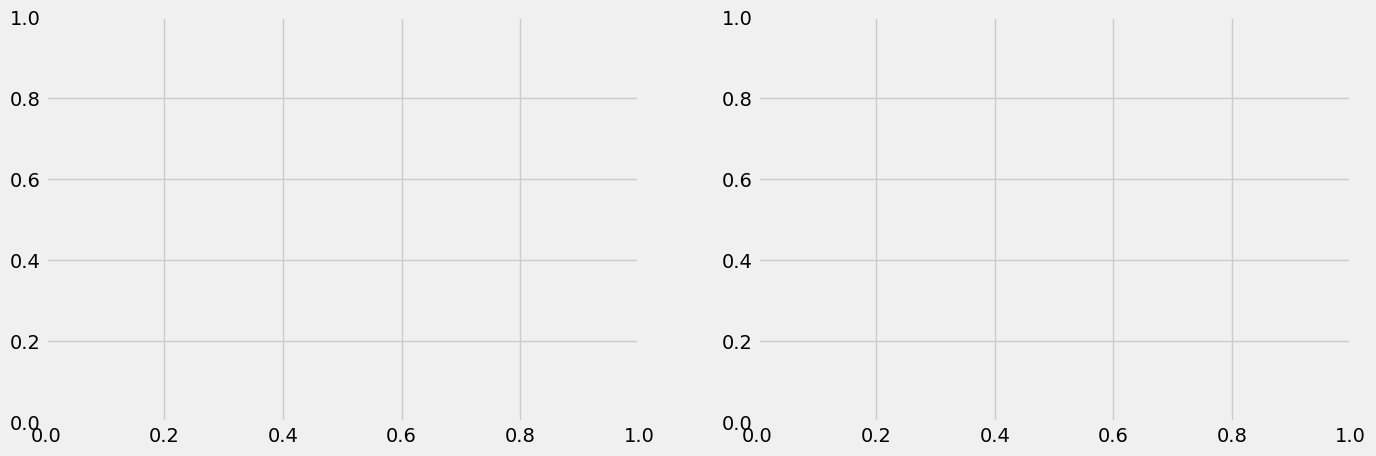

In [ ]:
plot_model_history(model_info)